# Seattle AirBnB Data analysis

This notebook is written for Udacity Data Science Nano degree project. The objective is to analyze Seattle AirBnB data, including the seasonal trend, pricing analysis and modeling. 

We will start with overviewing the data information for each spreadsheet first, then anaylze the trend and price modeling

More details about the project, required paackages, data files, etc can be found in the Readme.md file.

## Business Understanding
* The motivation of this study is to understand the price seasonal trend, find the key factors may impact the price modeling. To achieve this goal, I defined four questions to be answered for this study as following
* Question 1: Which month has the highest/lowest average list price?
* Question 2: What are the neighborhoods with highest and lowest price?
* Question 3: What are the numerical features strong correlated with price?
* Question 4: How is the predictability of using those features to predict price?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

## Data Understanding

In [2]:
# load data
df_cal = pd.read_csv('calendar.csv')
df_list = pd.read_csv('listings.csv')
df_review = pd.read_csv('reviews.csv')

### Overview of  calendar dataset

In [3]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Finding: for some dates, if no room available, so no price information. Price data is incomplete and need to be transfered to numeric value for analysis.

In [4]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


### Overview of  listing dataset

In [5]:
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### Overview of  listing dataset

In [7]:
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Prepare Data : Calendar Data Set Analysis

Let's start with the Calendar data set analysis with following items:
* The size of dataset
* Columns with and without missing values 
* Data features and seasonal trend of price
* Question 1: Which month has the highest/lowest average listing price?

In [9]:
print("Number of rows and columns", df_cal.shape)
print(df_cal.isnull().sum())
print(df_cal.describe(include='all'))

Number of rows and columns (1393570, 4)
listing_id         0
date               0
available          0
price         459028
dtype: int64
          listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-06-12         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


In [10]:
df_cal2 = df_cal.copy()

# remove the price dollar sign
df_cal2['price'] = df_cal['price'].str.replace('$','').str.replace(',','');

# update the price to numeric values
df_cal2['price'] = pd.to_numeric(df_cal2['price']);

In [11]:
df_cal2['Month'] = pd.to_datetime(df_cal2['date'])
df_cal2['Month']

0         2016-01-04
1         2016-01-05
2         2016-01-06
3         2016-01-07
4         2016-01-08
             ...    
1393565   2016-12-29
1393566   2016-12-30
1393567   2016-12-31
1393568   2017-01-01
1393569   2017-01-02
Name: Month, Length: 1393570, dtype: datetime64[ns]

In [12]:
df_cal2 = df_cal2.sort_values('Month', ascending=True)
df_cal2

,listing_id,date,available,price,Month
0,241032,2016-01-04,t,85.0,2016-01-04
1171285,7109735,2016-01-04,f,NaN,2016-01-04
442380,5736082,2016-01-04,f,NaN,2016-01-04
997180,7435912,2016-01-04,t,70.0,2016-01-04
1203040,1777158,2016-01-04,f,NaN,2016-01-04
...,...,...,...,...,...
924544,8849095,2017-01-02,t,250.0,2017-01-02
924179,9995551,2017-01-02,t,79.0,2017-01-02
923814,1450262,2017-01-02,t,295.0,2017-01-02
928194,6304139,2017-01-02,t,95.0,2017-01-02


In [13]:
# calculate the mean avarage price per month
Month_mean = df_cal2.groupby(df_cal2['Month'].dt.strftime('%B'), sort = False)['price'].mean()
Month_mean

Month
January      122.912176
February     124.293927
March        128.644488
April        135.097005
May          139.538183
June         147.473137
July         152.094150
August       150.656594
September    143.255949
October      137.031939
November     135.688738
December     137.251835
Name: price, dtype: float64

Text(0.5, 1.0, 'Average price at each month')

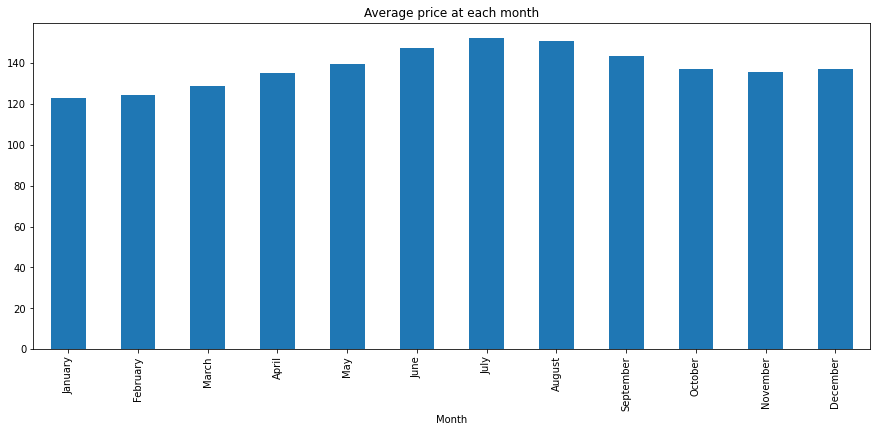

In [14]:
Month_mean.plot(kind = 'bar', figsize = (15,6));
plt.title('Average price at each month')

Finding to question 1:
The listing prices reaches their peak from June to August and are lowest from January to March. The highest listing price is in July, around 152 dollars. The lowest listing price is in January, around 122 dollars.

## Prepare Data : Listing Data Set Analysis

Continuing with the listing data set analysis with following items:
* Number of rows and columns in the dataset
* Columns with and without missing values
* Explore the dataset and features
* Question 2: what are the neighbourhoods with highest and lowest price
* Question 3: what are the numerical features strong correlated with price? 
* Question 4: How is the predictability of using those features to predict price?

In [15]:
print("Number of rows and colums:", df_list.shape)
df_list.isnull().sum()

Number of rows and colums: (3818, 92)


id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [16]:
df_list.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/5352741,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


### Explore some features in the listing

In [17]:
# Explore host locations

print('Value counts for host_location:', df_list['host_location'].value_counts())

Value counts for host_location: Seattle, Washington, United States         3259
US                                          246
Spokane, Washington, United States           41
Kent, Washington, United States              34
Los Angeles, California, United States       13
                                           ... 
Austin, Texas, United States                  1
Accra, Greater Accra, Ghana                   1
Alamosa, Colorado, United States              1
Santa Monica, California, United States       1
Las Vegas, Nevada, United States              1
Name: host_location, Length: 120, dtype: int64


<AxesSubplot:ylabel='host_response_time'>

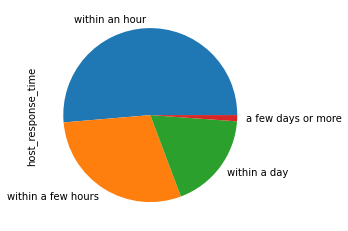

In [18]:
# Explore the host reponse time

host_resp = df_list['host_response_time'].value_counts()
host_resp_perc = host_resp/df_list.shape[0]
host_resp_perc.plot(kind = "pie", normalize =True)
                   

Text(0.5, 1.0, 'Distribution of Property Type')

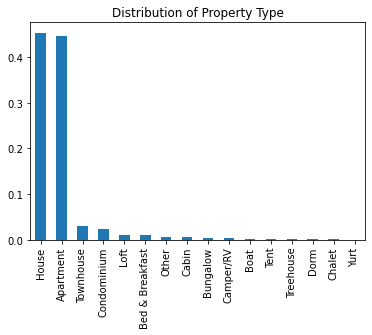

In [19]:
# Explore the property type

prop = df_list['property_type'].value_counts()
prop_perc = prop/df_list.shape[0]
prop_perc.plot(kind = "bar")
plt.title('Distribution of Property Type')

In [20]:
df_list2 = df_list.copy()
# remove the dollar sign
df_list2['price'] = df_list2['price'].str.replace('$','').str.replace(',','');

# update the price to numeric values
df_list2['price'] = pd.to_numeric(df_list2['price']);

In [21]:
# Sort the price according to the neighbourhood, looking for the neighbourhood with the highest and lowest price 

print(df_list2.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by = 'price', ascending = False))

                             price
neighbourhood_cleansed            
Southeast Magnolia      231.705882
Portage Bay             227.857143
Westlake                194.470588
West Queen Anne         187.769231
Montlake                182.789474
...                            ...
North Delridge           76.375000
Georgetown               76.125000
South Delridge           74.666667
Olympic Hills            71.687500
Rainier Beach            68.555556

[87 rows x 1 columns]


<AxesSubplot:xlabel='neighbourhood_cleansed'>

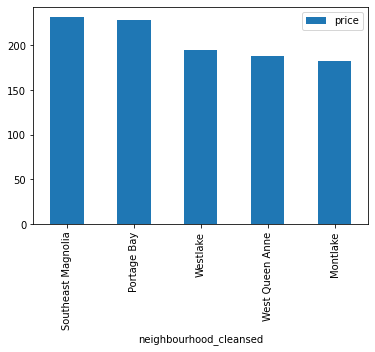

In [22]:
#plt.rcParams.update({'font.size': 10})

# Find the top 5 neighbourhoold with Highest price
price_nei = df_list2.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by = 'price', ascending = False).head()
price_nei.plot(kind = 'bar')

<AxesSubplot:xlabel='neighbourhood_cleansed'>

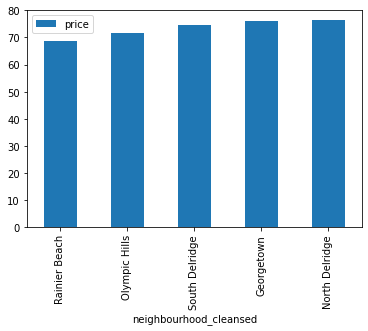

In [23]:
# Find the top 5 neighbourhoold with lowest price
price_nei = df_list2.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by = 'price', ascending = True).head()
price_nei.plot(kind = 'bar')

Findings to quesiton 2

The top two neighbourhood with highest price are the Southeast Magnolia neighborhood, averaging at 232 dollars and Portage Bay at 228 dollars.

The top two neighbourhood with lowest price areRainier Beach, averaging at $68 dollars and Olympic Hills averaging at 72 dollars. 


In [24]:
# Check if price has missing values, if it does, we want to remove those records from the dataset
df_list2['price'].isnull().sum()

0

In [25]:
# Screen all the numerical columns and find missing values in percentage

num_cols = df_list2.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col, df_list2[col].isnull().sum(), df_list2[col].isnull().sum()/df_list.shape[0] )

host_listings_count 2 0.0005238344683080147
host_total_listings_count 2 0.0005238344683080147
latitude 0 0.0
longitude 0 0.0
bathrooms 16 0.0041906757464641176
bedrooms 6 0.001571503404924044
beds 1 0.00026191723415400735
square_feet 3721 0.9745940282870613
price 0 0.0
review_scores_rating 647 0.16946045049764275
review_scores_accuracy 658 0.17234154007333682
review_scores_cleanliness 653 0.17103195390256679
review_scores_checkin 658 0.17234154007333682
review_scores_communication 651 0.17050811943425878
review_scores_location 655 0.1715557883708748
review_scores_value 656 0.17181770560502882
license 3818 1.0
reviews_per_month 627 0.1642221058145626


Screen of missing values of column:

* For small percentage of missing values, i.e. bathrooms, bedrooms, beds and review related volumns, default numbers will be assigned to replace NaN, i.e. 0 for missing values in bathrooms and review related column, 1 for bedroomsand beds.

* As there is significant large part of missing values in square_feet, the column will be dropped. 

* review_scores columns - Since these are review related scores, I will be setting all Nan values to 0 assuming no review scores for these listings.

* For host_listings_count and host_total_listings_count, only 2 rows with no values, will be replaced with 1.

### Regression Modeling

In [26]:
# Set 0 for Nan values in review related column and bathrooms
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    df_list2[col] = df_list2[col].fillna(0)

df_list2['bathrooms'] = df_list2['bathrooms'].fillna(0)

# Set 1 for bedrooms, beds and host_listing related column
df_list2['bedrooms'] = df_list2['bedrooms'].fillna(1)
df_list2['beds'] = df_list2['beds'].fillna(1)
df_list2['host_listings_count'] = df_list2['host_listings_count'].fillna(1)
df_list2['host_total_listings_count'] = df_list2['host_total_listings_count'].fillna(1)



<AxesSubplot:>

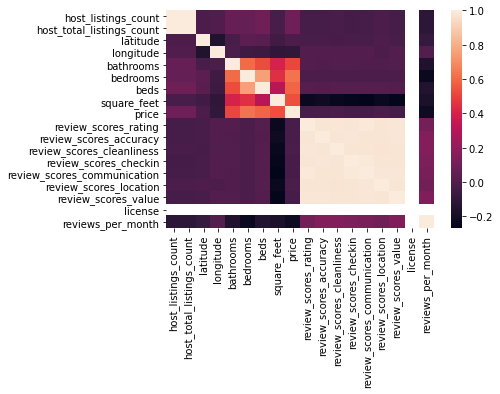

In [27]:
# Find how the numerical features correlated with price
X0 = df_list2.select_dtypes(include=['float', 'int'])
sns.heatmap(X0.corr())

Findings to question 3: by illustrating the correlation of all numerical columns in the listing spreadsheet with price column, it is shown the number of bathrooms, beds and bedrooms have strong correlation with the price. Therefore, for the modeling and price prediction, those column will be used.

In [28]:
X = df_list2[['bathrooms', 'bedrooms', 'beds']]
y = df_list2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2672, 3) (2672,)
(1146, 3) (1146,)


In [29]:
# Instantiate linear regression model and fit it to training data set
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.4331081285926507.  The rsquared score on the test data was 0.4706509323108564.


Findings to question 4: numerical features with strong correlation with price are bathrooms, bedrooms and beds, which are used as input for the linear regression model, the r2 scores on the training data and test data are all below 0.5.

In [30]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0 )
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 
y_train_preds = regressor.predict(X_train)
y_test_preds = regressor.predict(X_test)
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
train_score, test_score
print("The accuracy of prediction on the training data is {}, on the test data is {}".format(train_score, test_score))

The accuracy of prediction on the training data is 0.5358809389871391, on the test data is 0.4930079538492822


Findings to question 4: as linear regression doesnot performance well, randomforest model is applied with the r2 scores for the training datset is a little above 0.5, however, the r2 score for the testing data is still below 0.5. More relevant data may be needed to improve the performance. 

## Reviews Data Set

Finally comest to the reviews data set with following items:
* Number of rows and columns in the dataset
* Columns with and without missing values 
* Describe the dataset

In [31]:
print('Number of rows and columns:', df_review.shape)

Number of rows and columns: (84849, 6)


In [32]:
print(df_review.isnull().sum())

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


In [33]:
df_review.describe(include='all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
count,8.484900e+04,8.484900e+04,84849,8.484900e+04,84849,84831
unique,NaN,NaN,1930,NaN,14380,84136
top,NaN,NaN,2015-09-21,NaN,David,The host canceled this reservation the day bef...
freq,NaN,NaN,580,NaN,870,57
mean,3.005067e+06,3.058765e+07,NaN,1.701301e+07,NaN,NaN
std,2.472877e+06,1.636613e+07,NaN,1.353704e+07,NaN,NaN
min,4.291000e+03,3.721000e+03,NaN,1.500000e+01,NaN,NaN
25%,7.946330e+05,1.725127e+07,NaN,5.053141e+06,NaN,NaN
50%,2.488228e+06,3.228809e+07,NaN,1.413476e+07,NaN,NaN
75%,4.694479e+06,4.457648e+07,NaN,2.762402e+07,NaN,NaN


## Conclusions - Summary of findings to the questions

From analyzing the spreadsheets with diagrams and modeling, the findings to those four questions are summarized below:
* Question 1 price seasonal trend: the listing prices reaches their peak from June to August and are lowest from January to March. The highest listing price is in July, around 152 dollars. The lowest listing price is in January, around 122 dollars.
* Question 2 price neighborhood analysis:  the top two neighborhoods with highest price are the Southeast Magnolia neighborhood, averaging at 232 dollars and Portage Bay at 228 dollars. The top two neighborhoods with lowest price are Rainier Beach, averaging at 68 dollars and Olympic Hills averaging at 72 dollars.
* Question 3 key numerical factors impact price: the price is highly correlated with the number of bathrooms, bedrooms and beds
* Question 4 predictability of using simple regression model: use the key factors including the number of bathrooms, bedrooms and beds, to build linear regression model and random forest model to predict price. However, the accuracy of prediction from the testing data is close but slightly below 0.5, indicating more data may be needed for an improved price prediction, i.e. neighborhood, reviews, etc.